In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/bidirectional_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 101s 7ms/step


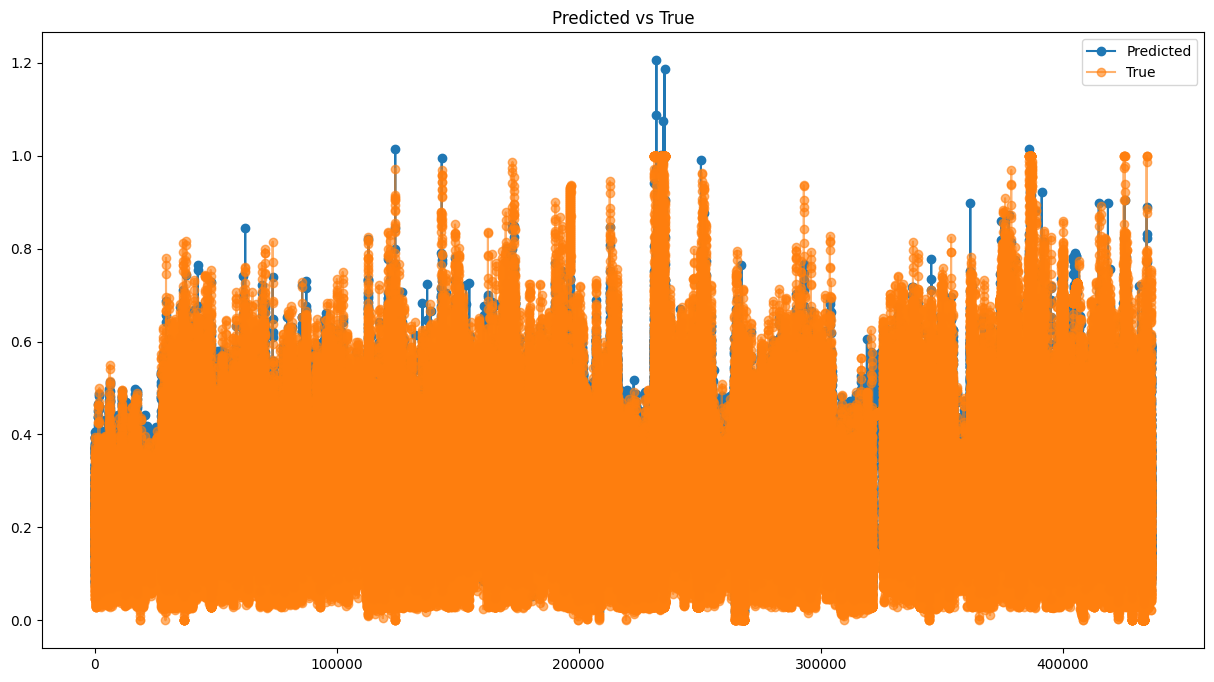

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04849989591402428,
 'mse': 0.06091671831946003,
 'rmse': 0.003710846570812437}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          157.881348
1          162.801620
2          157.186951
3          152.341309
4          164.523849
...               ...
436585     104.025566
436586     138.484161
436587     172.092758
436588     200.795456
436589     221.127060

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  157.881348
2023-01-01 00:15:00   140.0  162.801620
2023-01-01 00:30:00   139.0  157.186951
2023-01-01 00:45:00   145.0  152.341309
2023-01-01 01:00:00   159.0  164.523849
...                     ...         ...
2035-06-14 18:15:00   137.0  104.025566
2035-06-14 18:30:00   177.0  138.484161
2035-06-14 18:45:00   198.0  172.092758
2035-06-14 19:00:00   216.0  200.795456
2035-06-14 19:15:00   233.0  221.127060

[436590 rows x 2 columns]

AP, BE, EP: (0.8647286120355758, 0.07639908472270258, 0.058872303241721616)


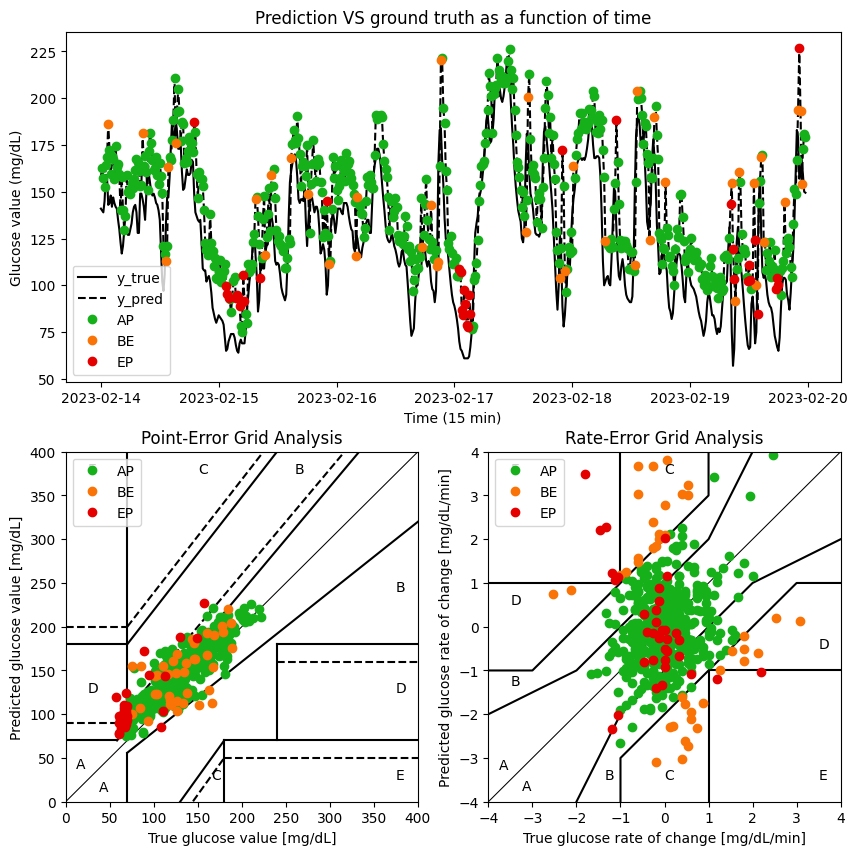

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  157.881348       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  162.801620 -0.066667  0.328018     AP   
2      2023-02-14 00:30:00   139.0  157.186951 -0.066667 -0.374311     AP   
3      2023-02-14 00:45:00   145.0  152.341309  0.400000 -0.323043     AP   
4      2023-02-14 01:00:00   159.0  164.523849  0.933333  0.812169     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0  104.025566  2.333333 -0.177893     BE   
436586 2035-07-28 18:30:00   177.0  138.484161  2.666667  2.297240     AP   
436587 2035-07-28 18:45:00   198.0  172.092758  1.400000  2.240573     AP   
436588 2035-07-28 19:00:00   216.0  200.795456  1.200000  1.913513     AP   
436589 2035-07-28 19:15:00   233.0  221.127060  1.133333  1.355440     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     A    lD  
436586     A     A  
436587     A     A  
436588     A     A  
436589     A     A  

[436590 rows x 8 columns]

# Predicción a 60 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 33ms/step


Glucose level Predict  Glucose level True
0               0.256264            0.219565
1               0.266960            0.217391

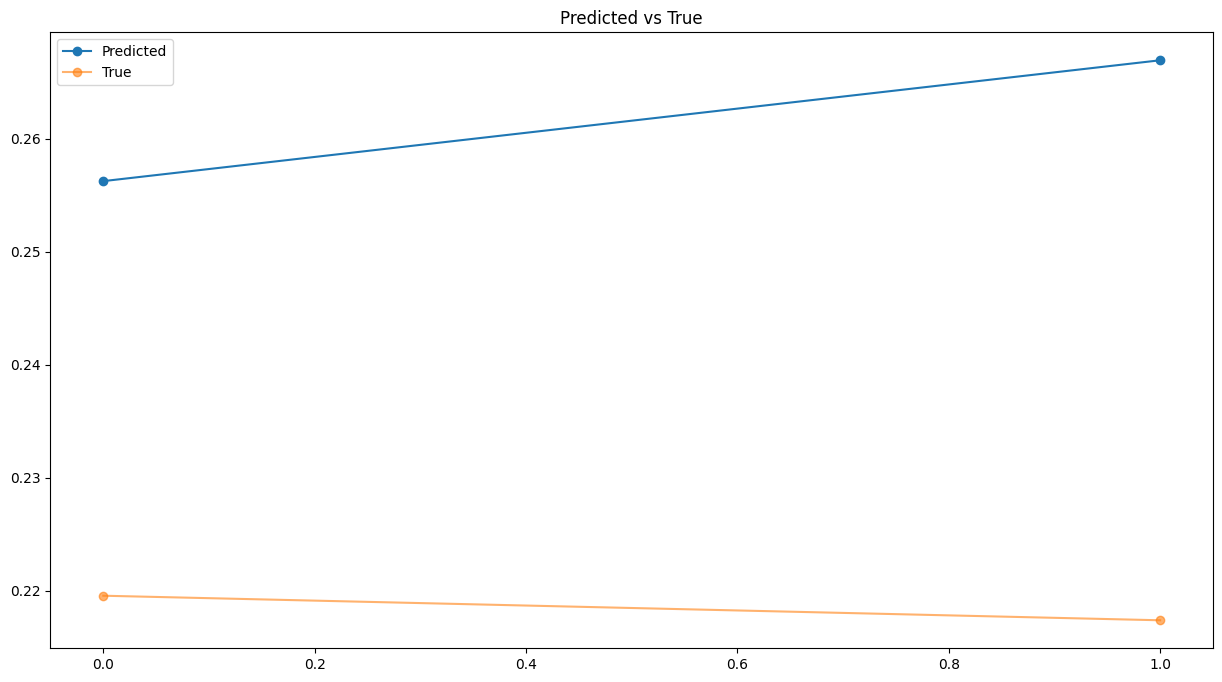

{'mae': 0.04313364780467488,
 'mse': 0.0436110276575751,
 'rmse': 0.0019019217333497802}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             157.881348               141.0
1             162.801620               140.0

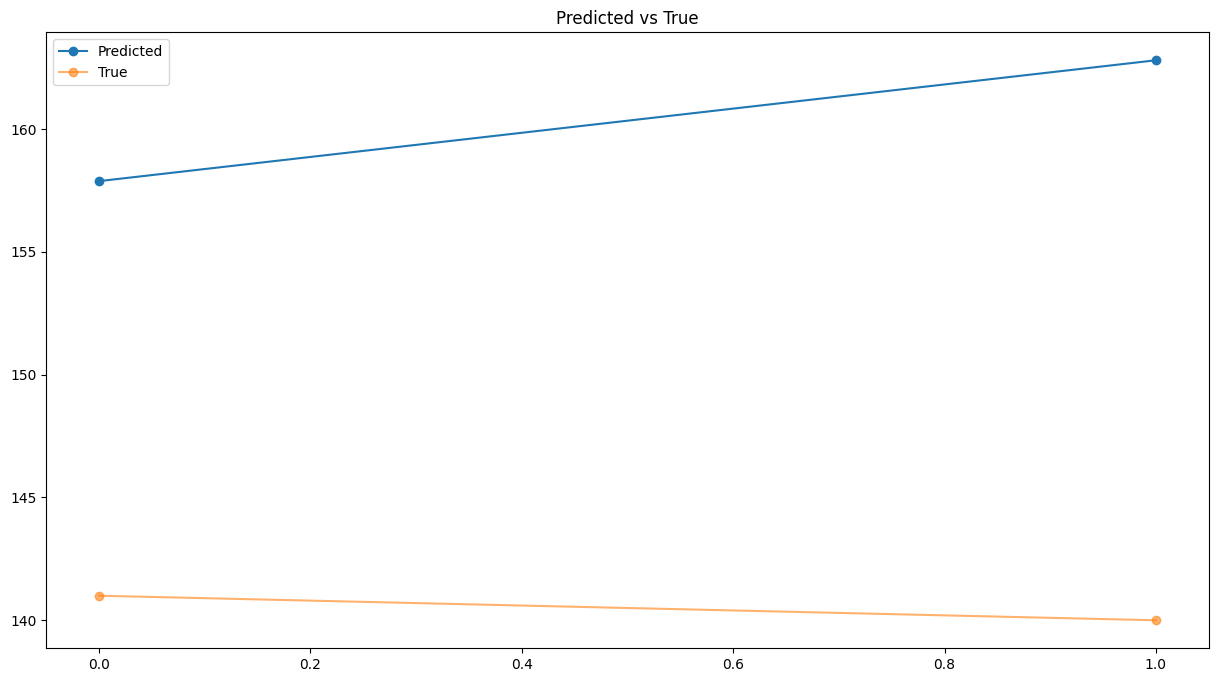

{'mae': 19.84148406982422, 'mse': 20.06107917535984, 'rmse': 402.4468976800563}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 60 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 60ms/step


Glucose level Predict  Glucose level True
0               0.256264            0.219565
1               0.321795            0.217391

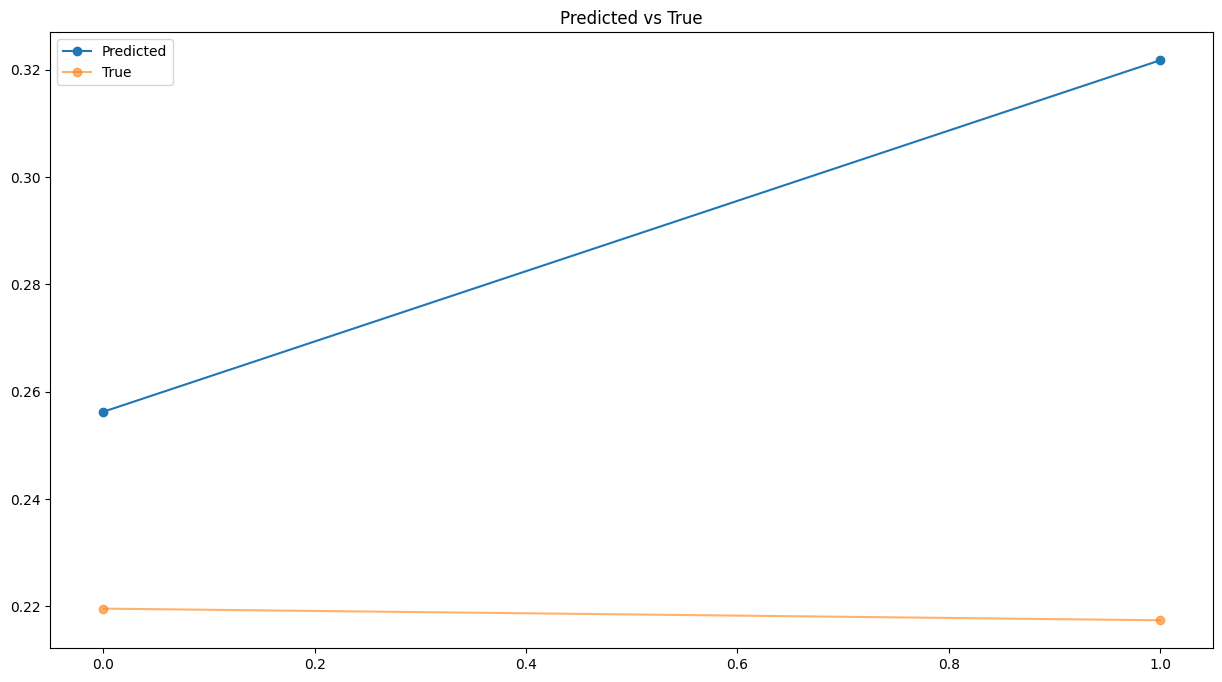

{'mae': 0.07055117345374562,
 'mse': 0.07825258135940101,
 'rmse': 0.006123466489409675}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             157.881348               141.0
1             188.025742               140.0

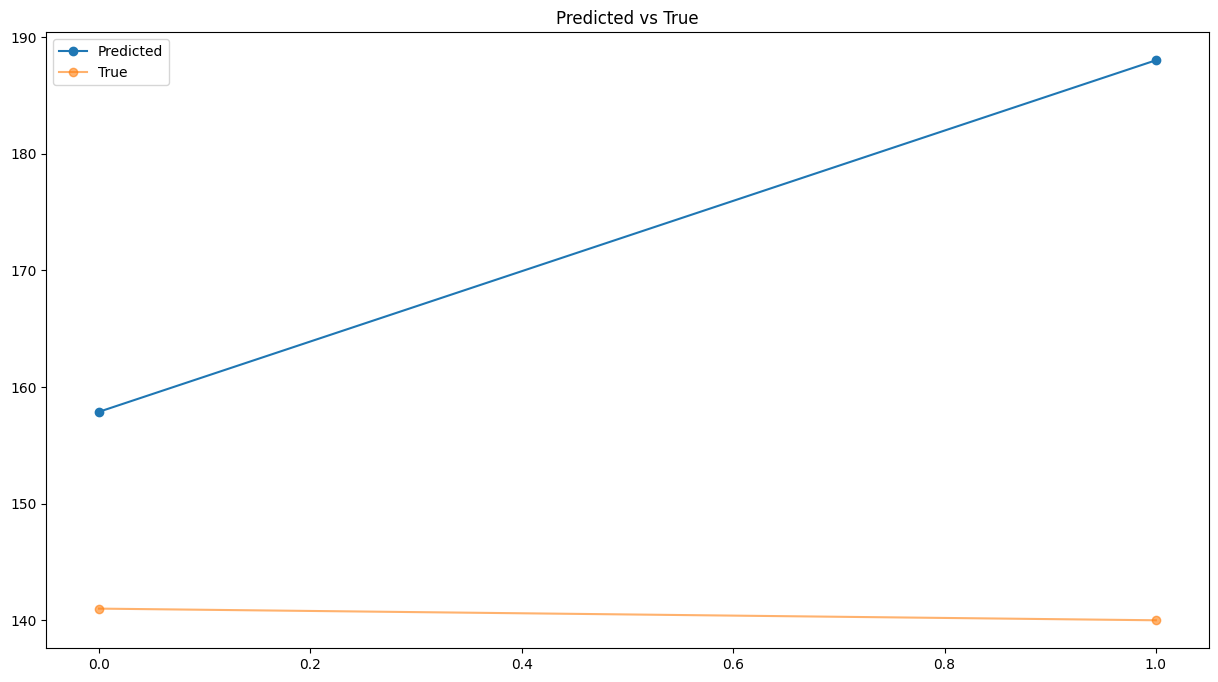

{'mae': 32.45354461669922,
 'mse': 35.996192525920165,
 'rmse': 1295.7258763631107}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 10ms/step


Glucose level Predict  Glucose level True
0               0.304634            0.182609
1               0.287320            0.154348
2               0.206981            0.152174
3               0.180615            0.150000
4               0.155246            0.123913

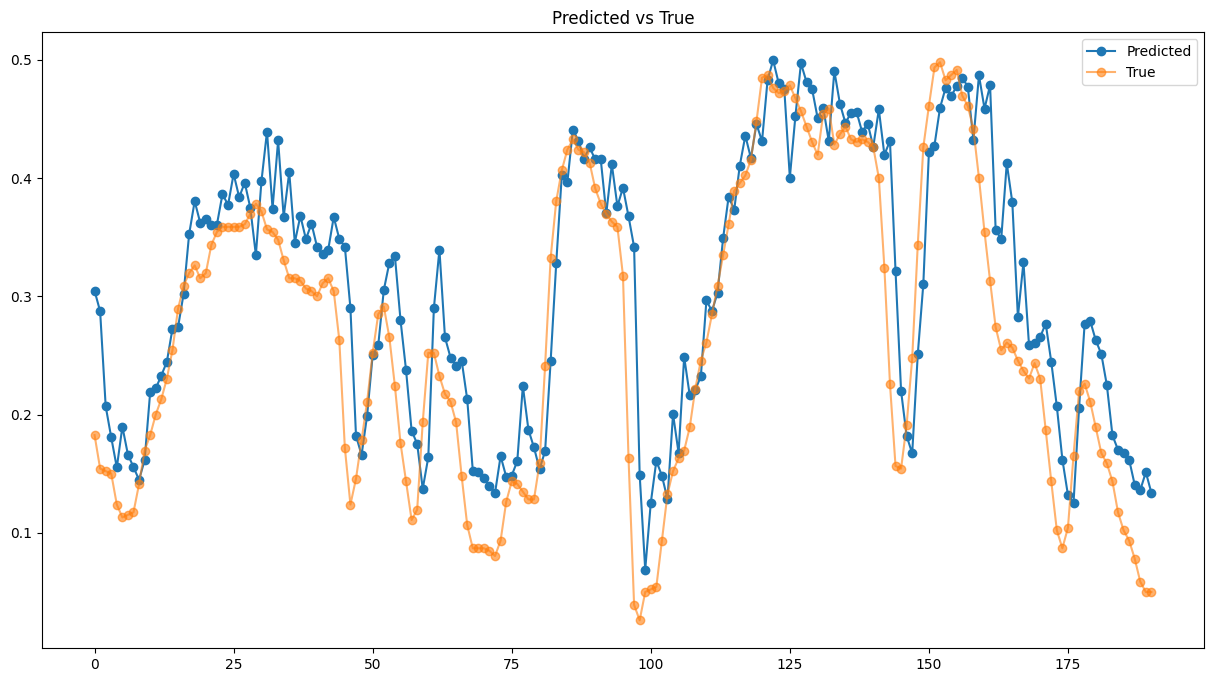

{'mae': 0.05089067704458321,
 'mse': 0.06760169248573247,
 'rmse': 0.004569988826935538}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

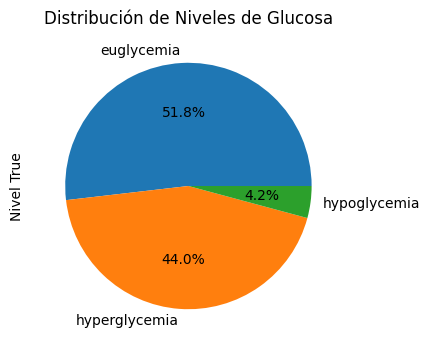

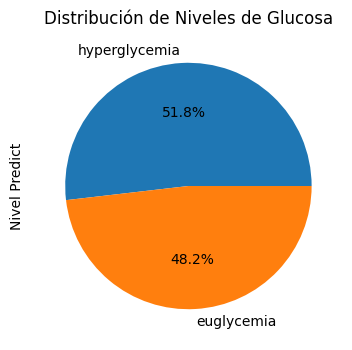

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0               124.0  euglycemia             180.131439  hyperglycemia
1               111.0  euglycemia             172.167404     euglycemia
2               110.0  euglycemia             135.211060     euglycemia
3               109.0  euglycemia             123.082756     euglycemia
4                97.0  euglycemia             111.412956     euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


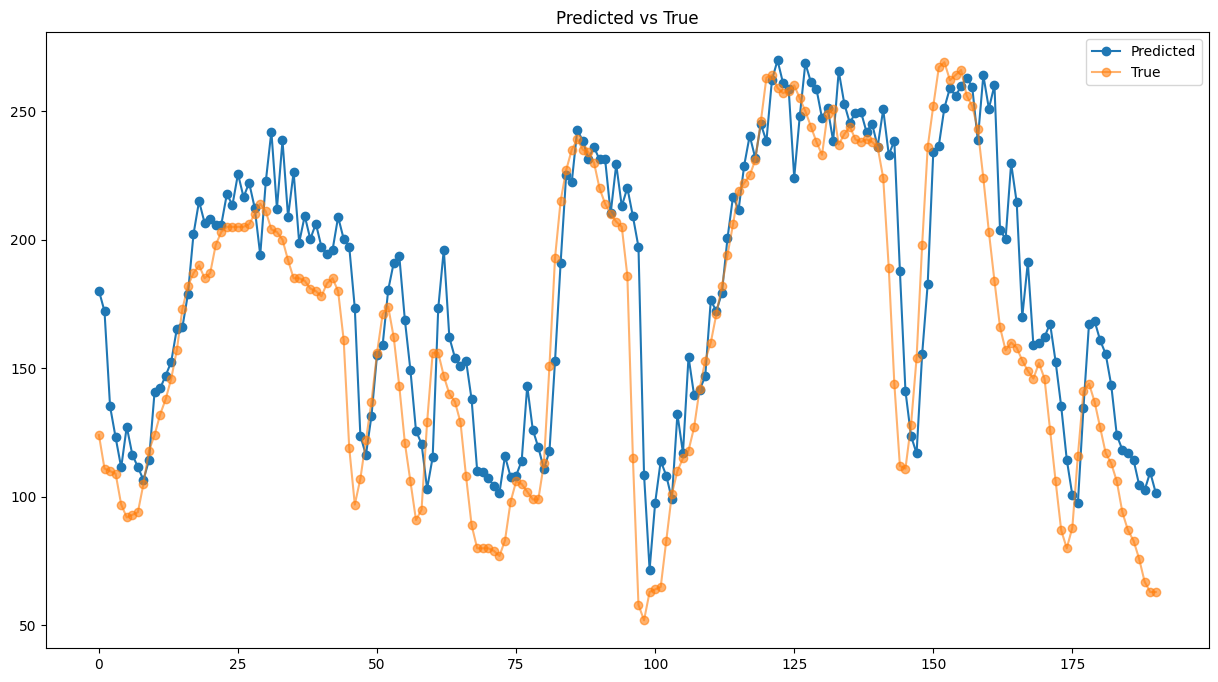

{'mae': 23.409712027504806,
 'mse': 31.096779344207405,
 'rmse': 967.0096855823243}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  180.131439
2023-01-01 00:15:00   111.0  172.167404
2023-01-01 00:30:00   110.0  135.211060
2023-01-01 00:45:00   109.0  123.082756
2023-01-01 01:00:00    97.0  111.412956
...                     ...         ...
2023-01-02 22:30:00    83.0  114.446281
2023-01-02 22:45:00    76.0  104.722763
2023-01-02 23:00:00    67.0  102.588638
2023-01-02 23:15:00    63.0  109.600334
2023-01-02 23:30:00    63.0  101.562569

[191 rows x 2 columns]

AP, BE, EP: (0.8526315789473684, 0.09473684210526316, 0.05263157894736842)


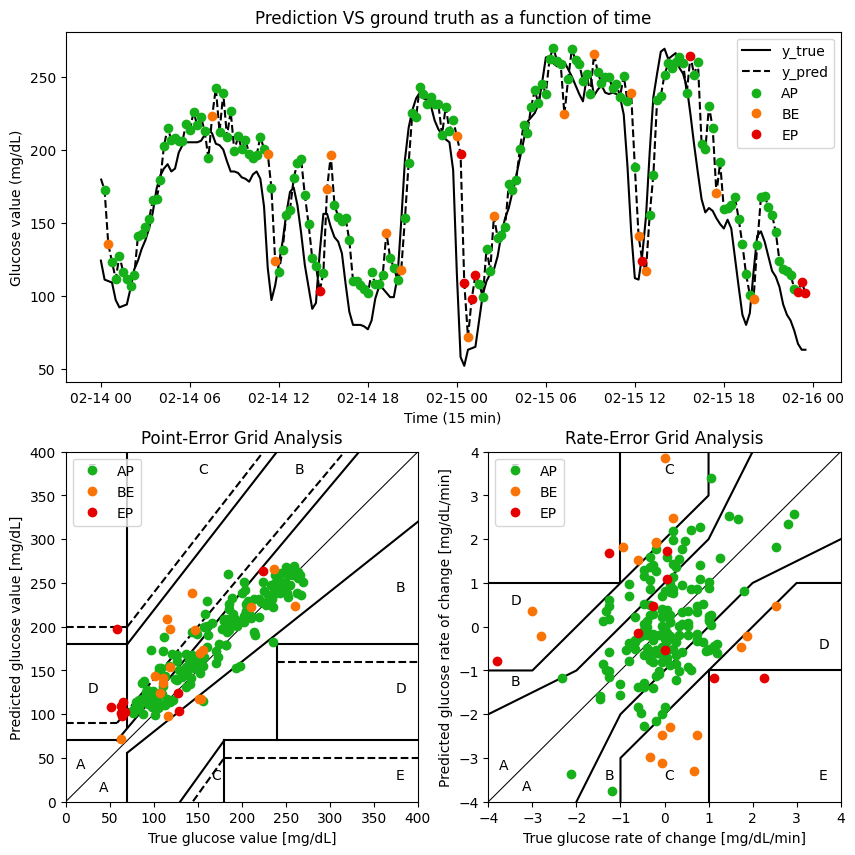

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 7ms/step


Glucose level Predict  Glucose level True
0               0.364360            0.373913
1               0.383407            0.400000
2               0.428022            0.404348
3               0.428520            0.406522
4               0.437608            0.397826

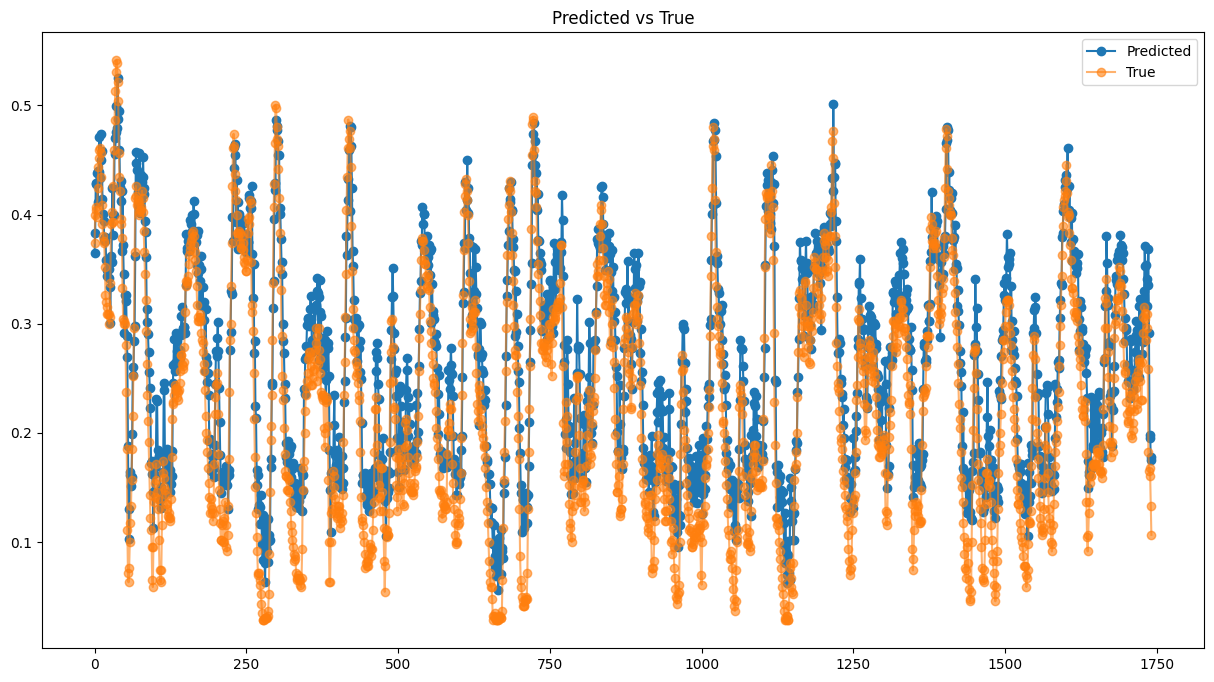

{'mae': 0.04324569863805171,
 'mse': 0.05047993606518675,
 'rmse': 0.0025482239451453414}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

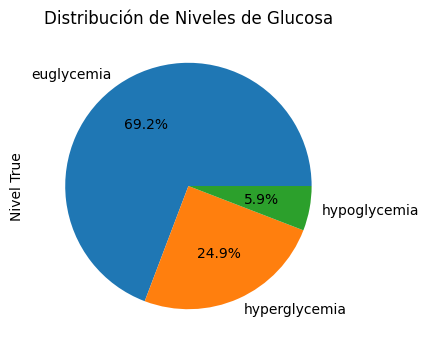

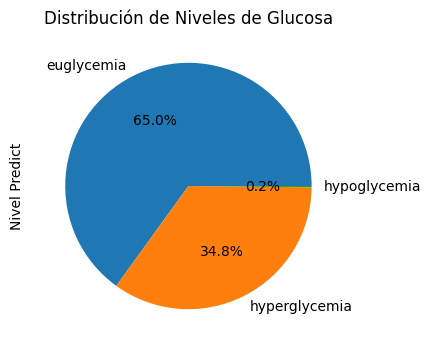

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             207.605606  hyperglycemia
1               224.0  hyperglycemia             216.367294  hyperglycemia
2               226.0  hyperglycemia             236.890015  hyperglycemia
3               227.0  hyperglycemia             237.119171  hyperglycemia
4               223.0  hyperglycemia             241.299652  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


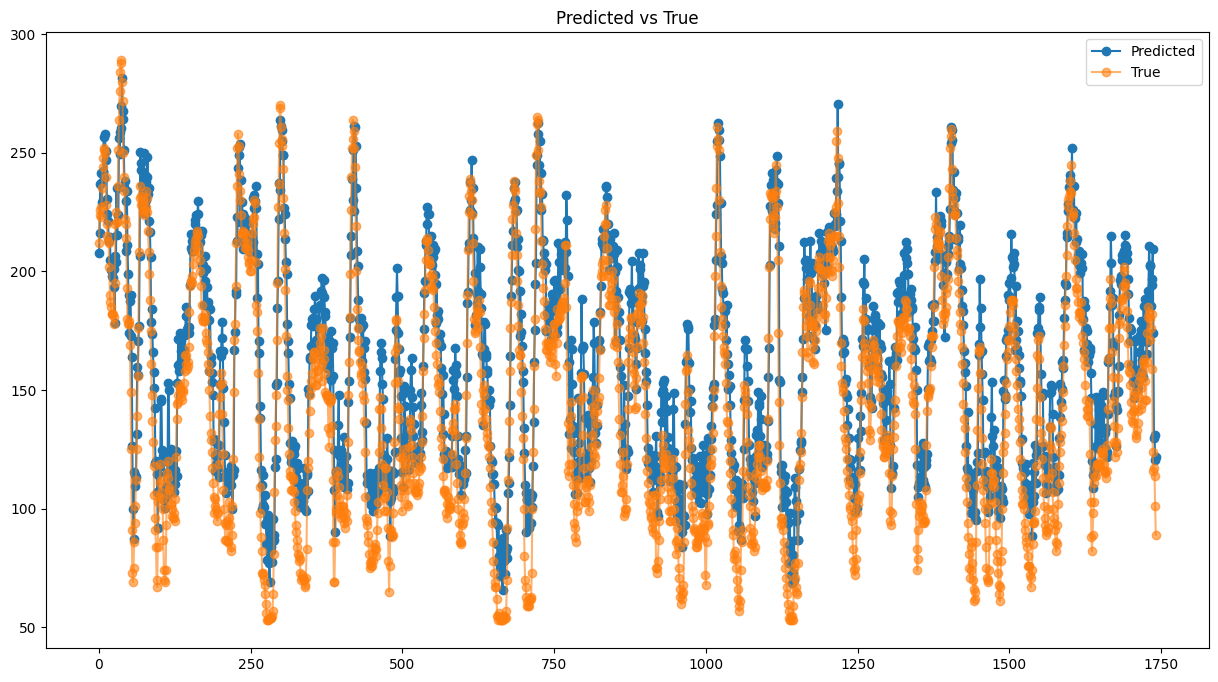

{'mae': 19.893022565699336, 'mse': 23.22077180250112, 'rmse': 539.204243103831}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  207.605606
2023-01-01 00:15:00   224.0  216.367294
2023-01-01 00:30:00   226.0  236.890015
2023-01-01 00:45:00   227.0  237.119171
2023-01-01 01:00:00   223.0  241.299652
...                     ...         ...
2023-01-19 02:15:00   116.0  174.137543
2023-01-19 02:30:00   117.0  129.968231
2023-01-19 02:45:00   114.0  131.075531
2023-01-19 03:00:00   101.0  120.659187
2023-01-19 03:15:00    89.0  122.019318

[1742 rows x 2 columns]

AP, BE, EP: (0.9149913842619184, 0.02469844916714532, 0.06031016657093624)


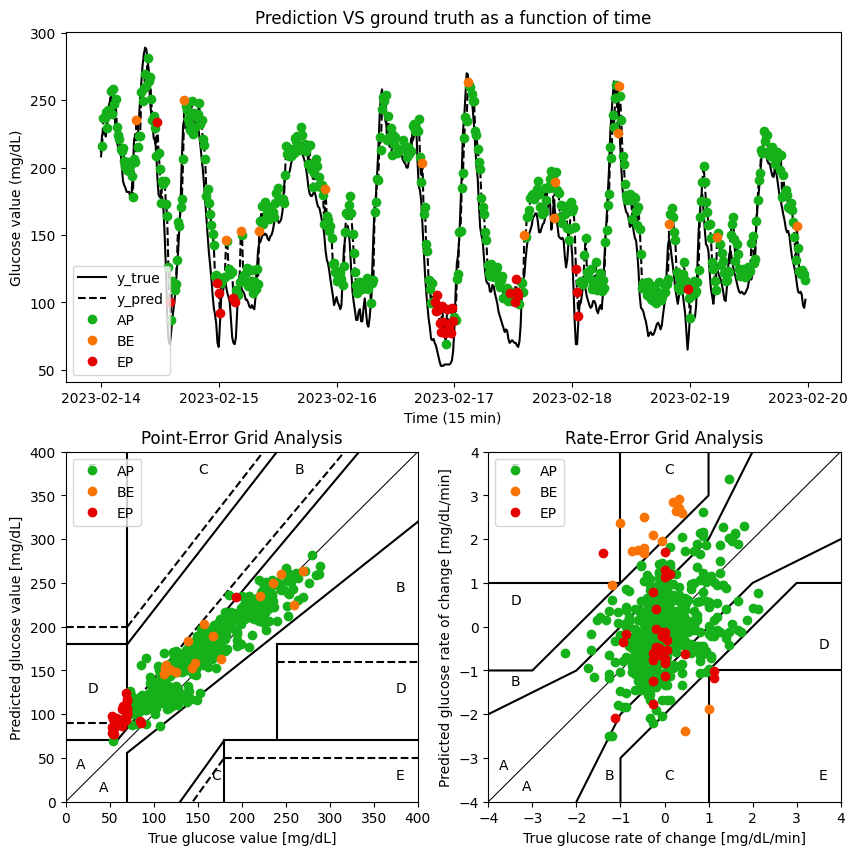

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 10ms/step


Glucose level Predict  Glucose level True
0               0.341004            0.261858
1               0.318932            0.229051
2               0.450452            0.196245
3               0.257099            0.163439
4               0.203726            0.130632

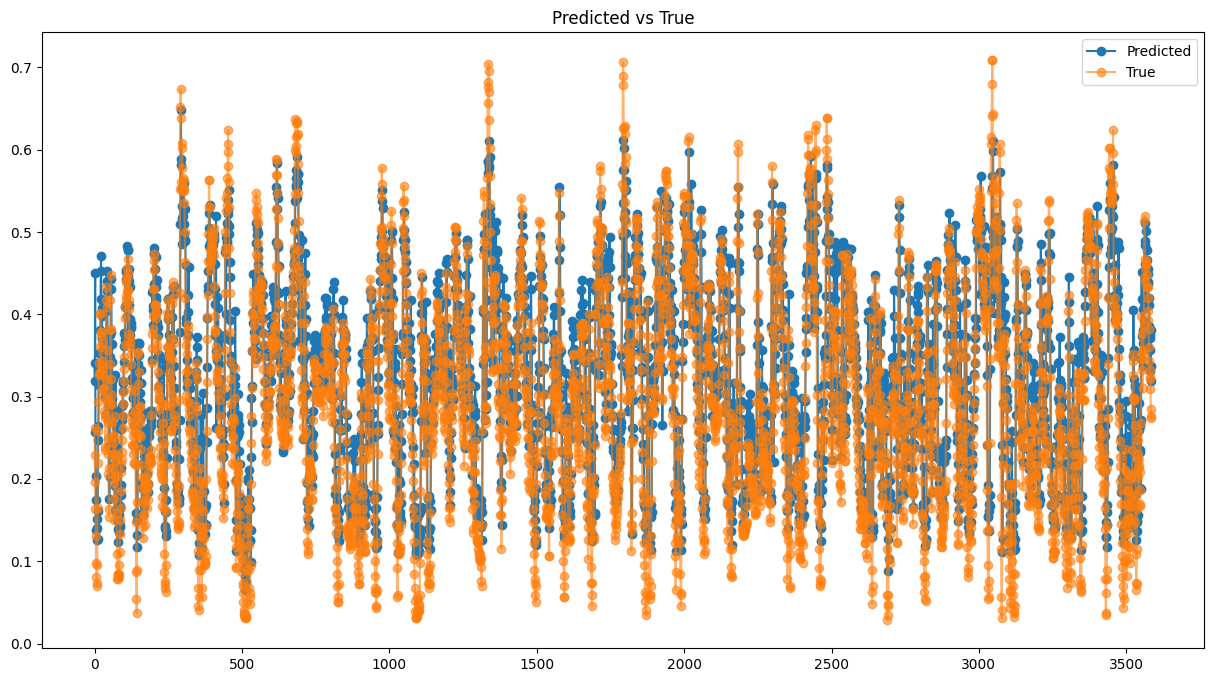

{'mae': 0.05229916339256565,
 'mse': 0.06446436884108867,
 'rmse': 0.004155654850079924}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

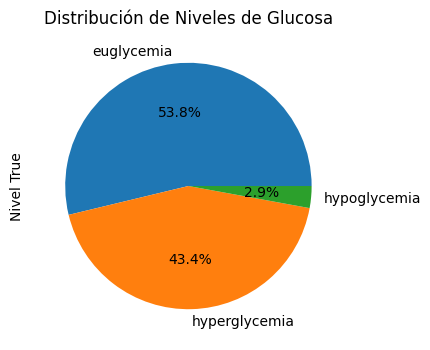

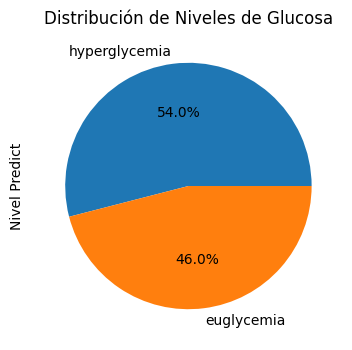

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             196.861832  hyperglycemia
1          145.363636  euglycemia             186.708771  hyperglycemia
2          130.272727  euglycemia             247.208084  hyperglycemia
3          115.181818  euglycemia             158.265579     euglycemia
4          100.090909  euglycemia             133.714157     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


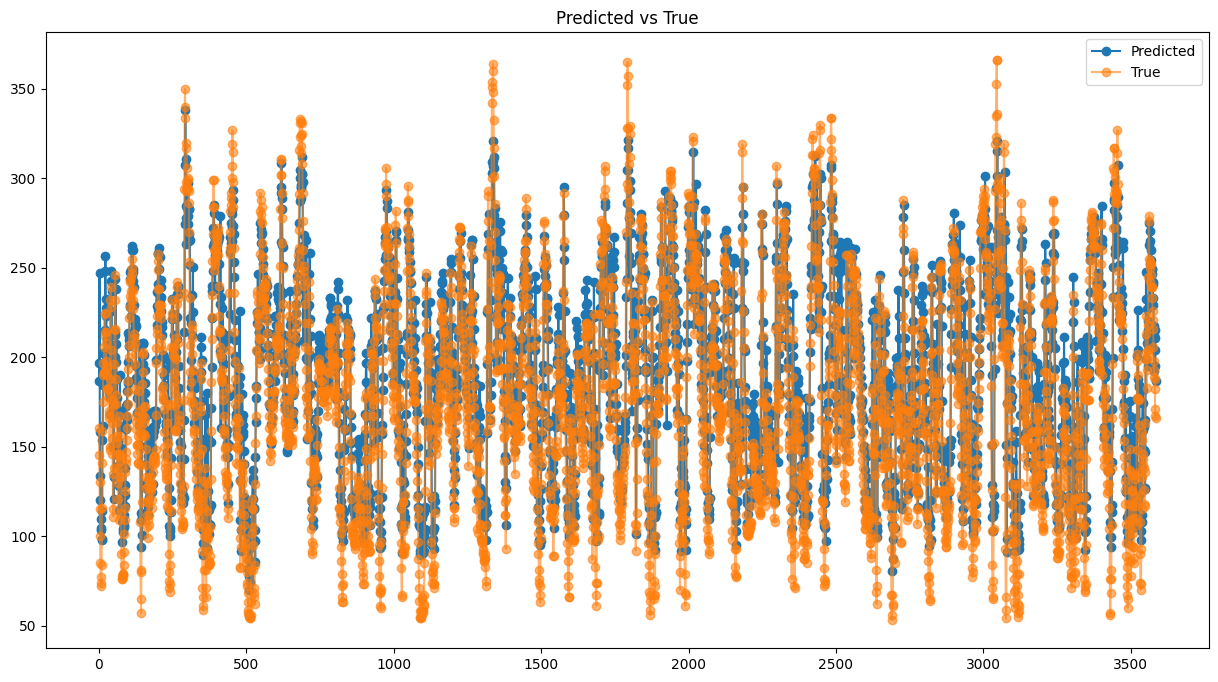

{'mae': 24.0576162593767, 'mse': 29.653610517441457, 'rmse': 879.3366167201145}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  196.861832
2023-01-01 00:15:00  145.363636  186.708771
2023-01-01 00:30:00  130.272727  247.208084
2023-01-01 00:45:00  115.181818  158.265579
2023-01-01 01:00:00  100.090909  133.714157
...                         ...         ...
2023-02-07 07:15:00  188.000000  210.708374
2023-02-07 07:30:00  182.000000  203.874344
2023-02-07 07:45:00  171.000000  215.471588
2023-02-07 08:00:00  167.000000  194.965302
2023-02-07 08:15:00  166.000000  186.514633

[3586 rows x 2 columns]

AP, BE, EP: (0.8351464435146444, 0.10376569037656903, 0.06108786610878661)


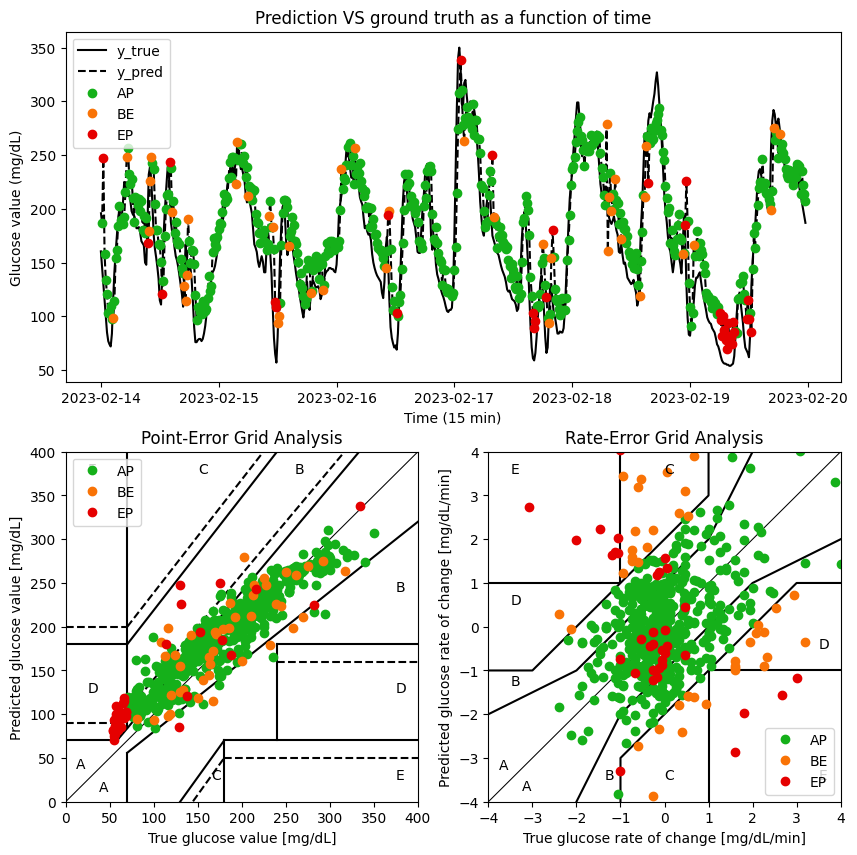

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 8ms/step


Glucose level Predict  Glucose level True
0               0.588980            0.534783
1               0.410210            0.500000
2               0.497229            0.484783
3               0.524022            0.463043
4               0.470816            0.428261

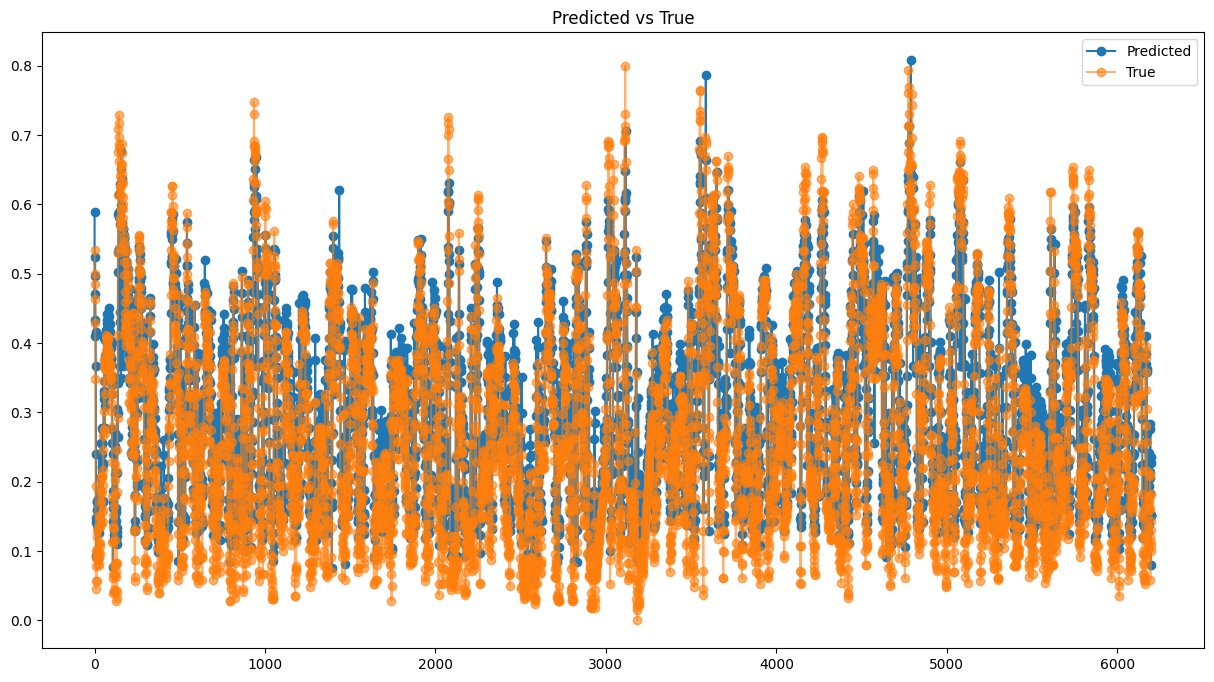

{'mae': 0.05748670272421093,
 'mse': 0.07303612005990298,
 'rmse': 0.005334274833404562}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

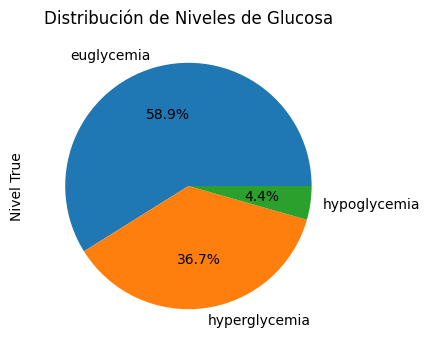

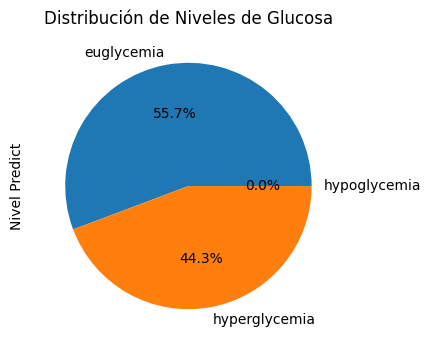

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             310.930908  hyperglycemia
1               270.0  hyperglycemia             228.696823  hyperglycemia
2               263.0  hyperglycemia             268.725494  hyperglycemia
3               253.0  hyperglycemia             281.049896  hyperglycemia
4               237.0  hyperglycemia             256.575409  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


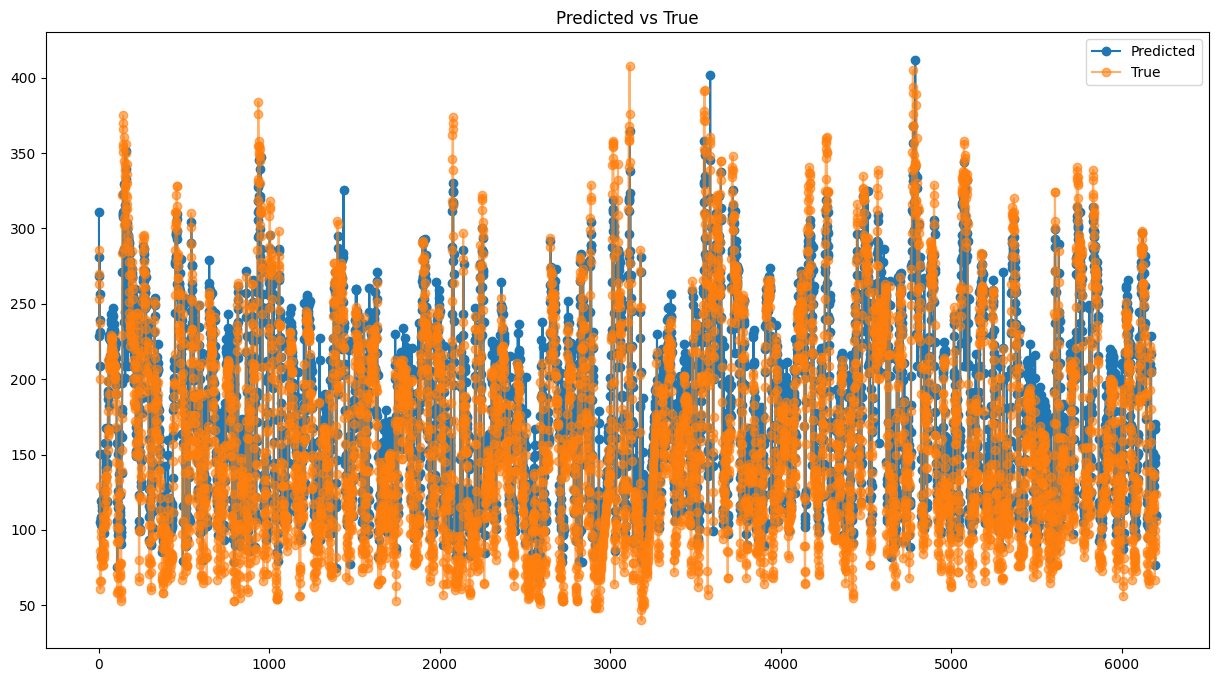

{'mae': 26.443884278248493,
 'mse': 33.59661617787437,
 'rmse': 1128.7326186034097}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  310.930908
2023-01-01 00:15:00   270.0  228.696823
2023-01-01 00:30:00   263.0  268.725494
2023-01-01 00:45:00   253.0  281.049896
2023-01-01 01:00:00   237.0  256.575409
...                     ...         ...
2023-03-06 13:00:00   100.0   76.822746
2023-03-06 13:15:00    89.0  148.577576
2023-03-06 13:30:00    92.0  144.215225
2023-03-06 13:45:00   106.0  109.590492
2023-03-06 14:00:00   124.0  109.468994

[6201 rows x 2 columns]

AP, BE, EP: (0.7820967741935484, 0.13129032258064516, 0.08661290322580645)


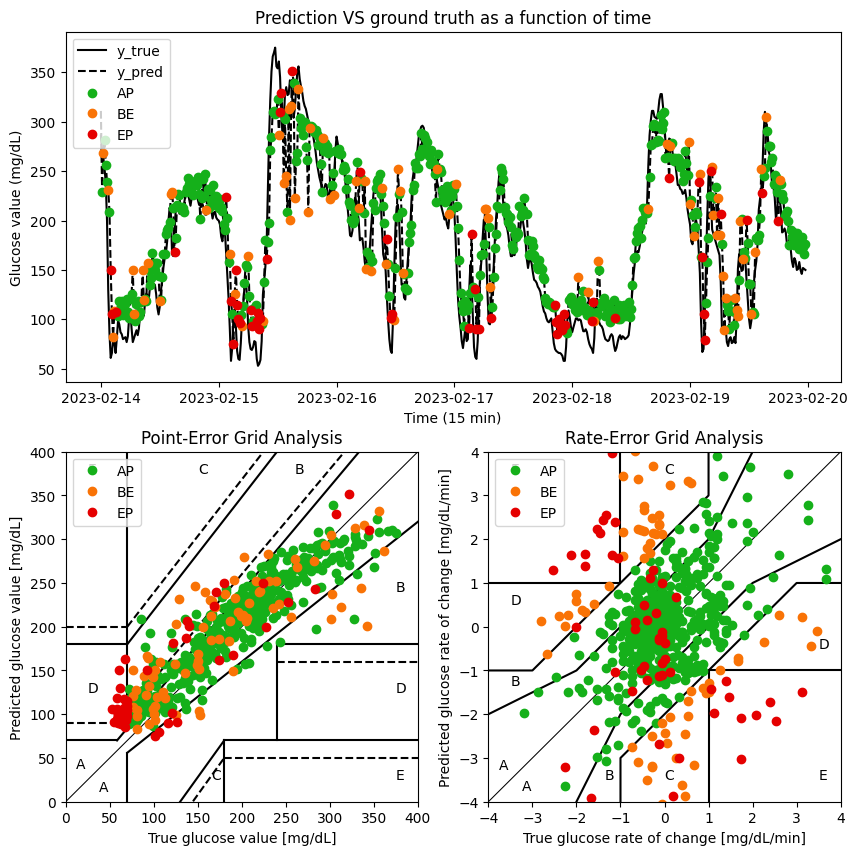

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)